In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Ice Cream.csv')
df.head()

,Temperature,Revenue
0,24.6,535
1,26.1,626
2,27.8,661
3,20.6,488
4,11.6,317


# Data preprocessing

In [4]:
df.isnull().sum()

,0
Temperature,0
Revenue,0


In [5]:
df.duplicated().sum()

np.int64(3)

In [44]:
df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.281600,522.058000
std,8.097597,175.410399
min,0.000000,10.000000
25%,17.175000,406.000000
50%,22.400000,530.000000
75%,27.800000,643.000000
max,45.000000,1000.000000


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 7.9 KB


In [8]:
df2 = df.drop_duplicates()
df2.duplicated().sum()

np.int64(0)

In [47]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
df = sc.fit_transform(df)

In [20]:
x = df['Temperature']
y = df['Revenue']

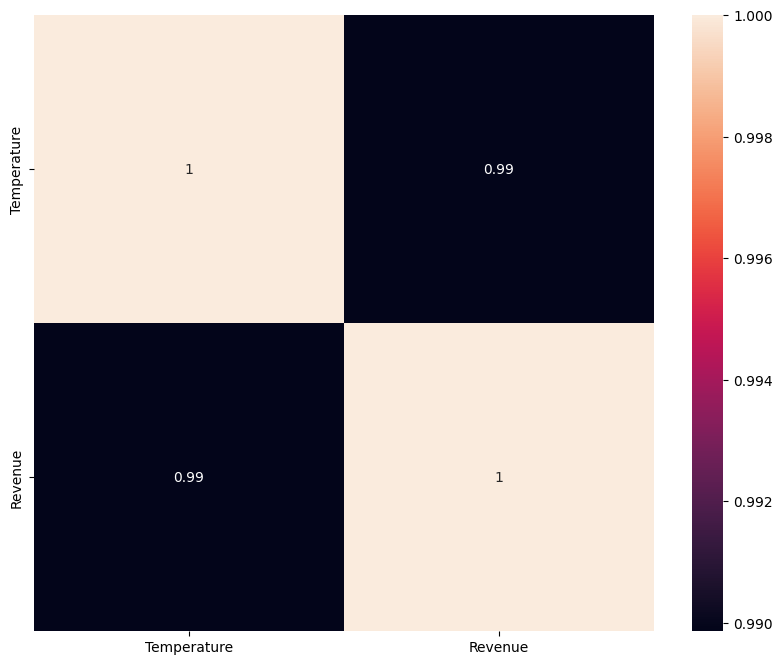

In [21]:
plt.figure(figsize=(10, 8))
sns.heatmap(df2.corr(), annot=True)
plt.show()

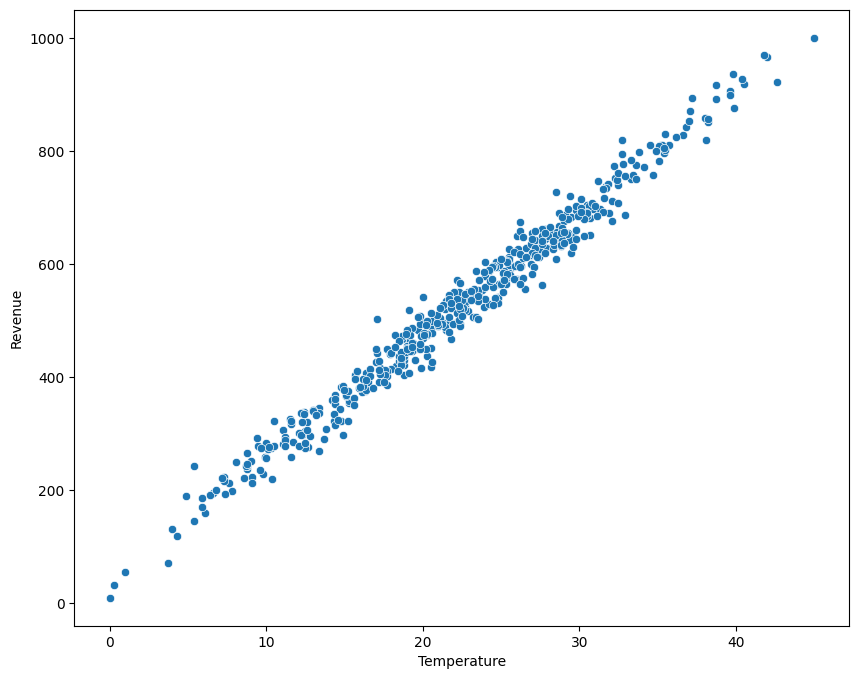

In [23]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=x,y=y)
plt.show()

# Model Building

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [26]:
model = LinearRegression()


In [27]:
x_train,x_test,y_train,test = train_test_split(x,y,test_size=0.2,random_state=0)
x_train = x_train.values.reshape(-1,1)
x_test = x_test.values.reshape(-1,1)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(test, y_pred)
mae = mean_absolute_error(test, y_pred)
r2 = r2_score(test, y_pred)

In [37]:
print(mse)

527.5620360568078


In [38]:
print(mae)

18.236220392188603


In [39]:
print(r2_score)

<function r2_score at 0x7d0b1a765f80>


In [43]:
predicted_revenue = model.predict([[22]])
print(predicted_revenue)

[516.46743082]
